In [1]:
## import libraries ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

# Part 1-Sourcing and loading the data

## 1a. Source and load the data

In [2]:
## Read in Apple dataset ##

import pandas as pd
from js import fetch

URL = "https://raw.githubusercontent.com/cctechsolutions/datasets/main/AppleStore.csv"

res = await fetch(URL)
text = await res.text()

filename = 'data.csv'

with open(filename, 'w') as f:
    f.write(text)

apple = pd.read_csv(filename, sep=',')

In [3]:
## Read in Google dataset ##

URL = "https://raw.githubusercontent.com/cctechsolutions/datasets/main/googleplaystore.csv"

res = await fetch(URL)
text = await res.text()

filename = 'data.csv'

with open(filename, 'w') as f:
    f.write(text)

google = pd.read_csv(filename, sep=',')

## 1b. and 1c. Pick and subset columns

In [4]:
## Subset the Apple data ##

apple = apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]

In [5]:
## Subset the Google data ##

google = google[['Category', 'Rating', 'Reviews', 'Price']]
google.shape

(10841, 4)

# Part 2-Cleaning, transforming, and visualizing

## 2a. Check and fix data types

In [6]:
## Check out the data types in Apple data frame ##

apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [7]:
## Check out the data types in Google data frame ##

google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [8]:
## Check unique values of the price column ##

googleproblems = google['Price'].unique()
googleproblems

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [9]:
## Check which data points have the value 'Everyone' for the 'Price' column ##

google[google['Price']=='Everyone']


,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [10]:
## Remove the row with the problematic value ## 

google = google.drop(10472)

In [11]:
## Re-check unique values of the price column ##

googleproblems = google['Price'].unique()
googleproblems

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [12]:
## Convert the price values to numeric ##

google['Price'] = pd.to_numeric(google['Price'], errors='ignore')

In [13]:
## Check the type to make sure price is now numeric ##

google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [14]:
## Convert the reviews values to numeric ##

google['Reviews'] = pd.to_numeric(google['Reviews'], errors='ignore')

In [15]:
## Check the type to make sure price is now numeric ##

google.dtypes
google.shape

(10840, 4)

## 2b. Add platform column

In [16]:
## Add the column 'Platform' to both datasets ##

apple['Platform'] = 'apple'
google['Platform'] = 'google'

## 2c. Change column names to prepare dataset merge

In [17]:
## Store the old column names of the Apple data frame ##

apple.columns = ['prime_genre', 'user_rating', 'rating_count_tot', 'price', 'Platform']
old_names = apple.columns

In [18]:
## Create a variable called new_names where you'll store the column names of the Google data frame ##

google.columns = ['Category', 'Rating', 'Reviews', 'Price', 'Platform']
new_names = google.columns

In [19]:
## Change the column names in the Apple dataset ##

old_names.columns = ['prime_genre', 'user_rating', 'rating_count_tot', 'price', 'Platform']\

new_names.columns = ['Category', 'Rating', 'Reviews', 'Price', 'Platform']

apple = apple.rename(columns=dict(zip(old_names, new_names)))

## 2d. Join the two datasets

In [20]:
## Join the two datasets ##

df = google.append(apple)

<ipython-input-20-23976558e93d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = google.append(apple)


In [21]:
## Check the merge by viewing a sample of the combined dataset ##

df.sample(12)

,Category,Rating,Reviews,Price,Platform
9158,FAMILY,4.4,93870,0,google
1057,FINANCE,3.4,31906,0,google
10506,FAMILY,4.2,38473,0,google
5137,Games,4.5,8402,0.0,apple
2152,Utilities,4.0,1477,1.99,apple
4799,FAMILY,4.8,1499466,0,google
7777,FAMILY,4.7,92010,0,google
8859,TOOLS,1.7,10,0,google
4710,FAMILY,4.3,589,0,google
3740,NEWS_AND_MAGAZINES,4.5,357944,0,google


## 2e. Eliminate NaN values

In [22]:
## Check the dimensions of the new dataset ##

df.shape

(18037, 5)

In [23]:
## Drop all NaN values ##

df = df.dropna()

In [24]:
## Check the dimensions after dropping NaN values ##

df.shape

(16563, 5)

## 2f. Filter data

In [25]:
# Subset your df to pick out just those rows whose value for 'Reviews' is equal to 0. ##
# Do a count() on the result. 

column = df['Reviews'] 
count = column[column == 0].count()

count

929

In [26]:
## Eliminate the observations that have 0 reviews. ##
df = df.loc[df['Reviews'] != 0]

## 2g. Summarize the data

In [27]:
## Summarize data analytically the reviews column for each platform. ##

df.groupby('Platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


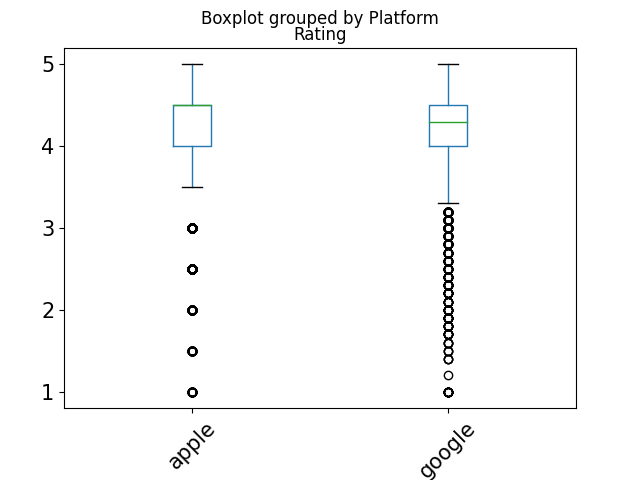

In [28]:
## Summarize data visually ##

df.boxplot(by='Platform', column ='Rating', grid=False, rot=45, fontsize=15)
plt.show()

# Part 3-Modelling

## 3a. Hypothesis formulation

H-null: the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform.)

H-alternative: the observed difference in the average ratings of apple and google users is not due to chance (and is actually due to platform.)

We're also going to pick a significance level of 0.05.

## 3b. Getting the distribution of the data

In [29]:
# Create a subset of the column 'Rating' by the different platforms.
# Call the subsets 'apple' and 'google' 
apple = df[df['Platform'] =='apple']['Rating']
apple.head()

google = df[df['Platform'] == 'google']['Rating']
google.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [30]:
## Perform normality test on the Apple subset ##

apple_normal = stats.normaltest(apple)
print(apple_normal)

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)


In [31]:
## Perform normality test on the Google subset ##

google_normal = stats.normaltest(google)
print(google_normal)

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)


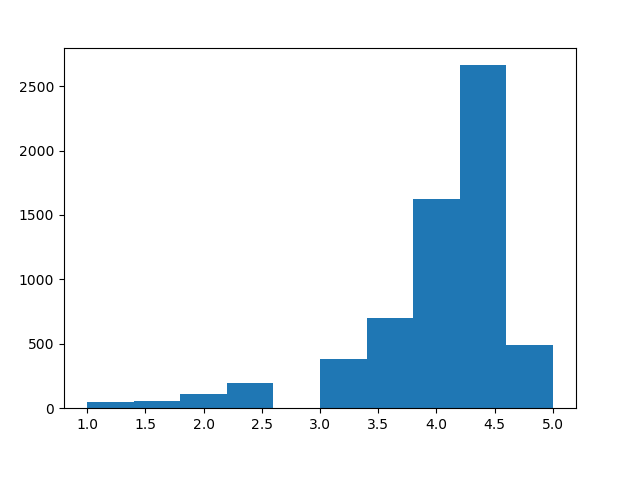

In [32]:
## Display a histogram of the Apple data ##

histoApple = plt.hist(apple)
histoApple

plt.show()

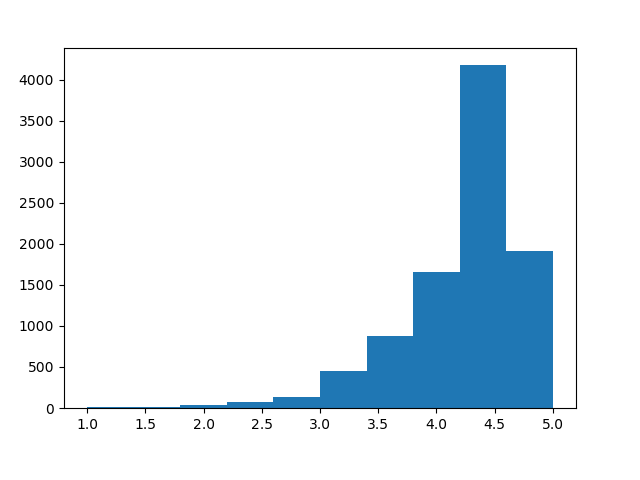

In [33]:
## Display a histogram of the Google data ##

histoGoogle = plt.hist(google)
histoGoogle

plt.show()

## 3c. Permutation test

In [34]:
## Create permutation column ##
## Summarize data analytically the permutation column for each platform ##

df['Permutation1'] = np.random.permutation(df['Rating'])

df.groupby('Platform')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
apple,6268.0,4.138162,0.613144,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.132554,0.612847,1.0,4.0,4.3,4.5,5.0


In [35]:
## Compare permutation summary data to previous rating summary data ##

df.groupby('Platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [42]:
## Make a list of the difference ##

difference = list()
for i in range(10000):
    permutation = np.random.permutation(df['Rating'])
    difference.append(np.mean(permutation[df['Platform']=='apple']) - np.mean(permutation[df['Platform']=='google']))

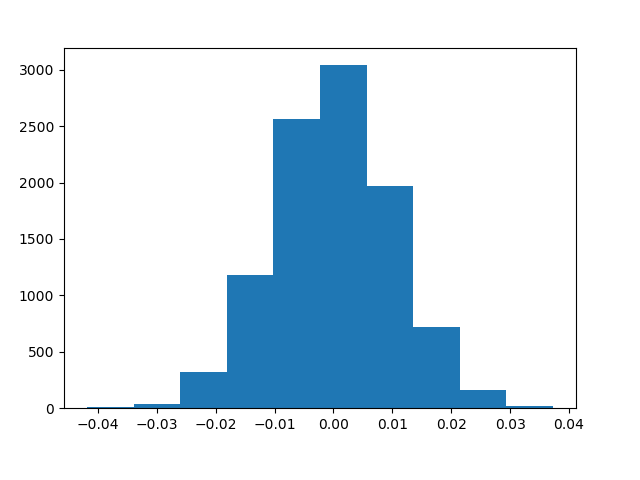

In [43]:
## Create a histogram of the difference ##

histo = plt.hist(difference)
plt.show()

In [41]:
## Print the final difference ##

obs_difference = np.mean(apple) - np.mean(google)
obs_difference = abs(obs_difference)
obs_difference

0.1420605474512291